## ສ້າງ Chatbot ໂດຍໃຊ້ Multiple Tool ໂດຍໃຊ້ Langgraph

**ArxivQueryRun ?**
  - ເປັນ tool ສຳຫຼັບຄົ້ນຫາເອກະສານວິທະຍາສາດຈາກ arXiv
  - arXiv = ຖານຂໍ້ມູນເອກະສານວິທະຍາສາດອອນລາຍ
  - ໃຊ້ຄົ້ນຫາ research papers, preprints ໃນດ້ານຟີຊິກ, ຄະນິດສາດ, ຄອມພິວເຕີສາດ
  - ສາມາດຄົ້ນຫາດ້ວຍຄຳສຳຄັນ, ຊື່ຜູ້ຂຽນ, ຫຼື ຫົວຂໍ້

**WikipediaQueryRun ?**
  - ເປັນ tool ສຳຫຼັບຄົ້ນຫາຂໍ້ມູນຈາກ Wikipedia
  - ໃຫ້ຂໍ້ມູນທົ່ວໄປເກີ່ຍວກັບບຸກຄົນ, ສະຖານທີ່, ເຫດການ, ແນວຄວາມຄິດ
  - ອ່ານງ່າຍກວ່າເອກະສານວິທະຍາສາດ

**WikipediaAPIWrapper ?**
 - ເປັນ utility class ທີ່ຫໍ່ຫຸ້ມ Wikipedia API
 - ຈັດການການສື່ສານກັບ Wikipedia servers
 - ກຳນົດຄວາມຍາວຂອງຜົນລັບ, ພາສາ, ແລະ ຕົວເລືອກອື່ນໆ
 - ເຮັດໃຫ້ການໃຊ້ Wikipedia API ງ່າຍຂຶ້ນ

 **ArxivAPIWrapper ?** 
 - ເປັນ utility class ທີ່ຫໍ່ຫຸ້ມ arXiv API
 - ຈັດການການຄົ້ນຫາແລະການດຶງຂໍ້ມູນຈາກ arXiv
 - ກຳນົດຈຳນວນຜົນລັບ, ຟີລເຕີຂໍ້ມູນ
 - ຈັດຮູບແບບຜົນລັບໃຫ້ເໝາະສຳຫຼັບການນຳໃຊ້ 

In [23]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [24]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=1000)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

arxiv


In [25]:
arxiv.invoke("Attention iss all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers.\n\n

In [26]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=1000)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [27]:
wiki.invoke("What is RAG")

'Page: Retrieval-augmented generation\nSummary: Retrieval-augmented generation (RAG) is a technique that enables large language models (LLMs) to retrieve and incorporate new information. With RAG, LLMs do not respond to user queries until they refer to a specified set of documents. These documents supplement information from the LLM\'s pre-existing training data. This allows LLMs to use domain-specific and/or updated information that is not available in the training data. For example, this helps LLM-based chatbots access internal company data or generate responses based on authoritative sources.\nRAG improves large language models (LLMs) by incorporating information retrieval before generating responses. Unlike traditional LLMs that rely on static training data, RAG pulls relevant text from databases, uploaded documents, or web sources. According to Ars Technica, "RAG is a way of improving LLM performance, in essence by blending the LLM process with a web search or other document look-

In [28]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [ ]:
tavily.invoke("summarize Google I/O 2025")

[{'title': 'Latest news from Google I/O 2025 - Plain Concepts',
  'url': 'https://www.plainconcepts.com/google-io-2025-recap/',
  'content': 'Another aspect to note is that Google also seems to be betting on Samsung for the hardware of its XR glasses, which will be manufactured by Xreal under the name Project Aura.\n\nAs for the functions of these XR glasses, Google emphasized that they are an excellent tool to use with Gemini.\n\nAnd here is the summary of Google I/O 2025. Don’t miss the latest news in our networks and newsletter!\n\nImage 3: Elena Canorea\n\n Author \n\n Elena Canorea \n\n Communications Lead \n\n_LinkedIn_\n\nShare\n\nTweet [...] The wait is over for one of the most important developer events of the year: Google I/O. The technology giant is immersed in one of its benchmark conferences, where they are launching numerous news about the latest tools and developments they are working on. A long list of interesting advances in generative AI that are going to completely c

In [29]:
### Combine all the tools in the list

tools=[arxiv,wiki,tavily]

In [30]:
## Initialize my LLM model

from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen/qwen3-32b")

llm_with_tools=llm.bind_tools(tools)

In [20]:
llm_with_tools.invoke([HumanMessage(content=f"What is the recent Google AI News")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'sd2rjdp3n', 'function': {'arguments': '{"query":"Google AI latest news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 884, 'total_tokens': 914, 'completion_time': 0.060135181, 'prompt_time': 0.016586073, 'queue_time': 0.050438418000000006, 'total_time': 0.076721254}, 'model_name': 'meta-llama/llama-4-maverick-17b-128e-instruct', 'system_fingerprint': 'fp_c527aa4474', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a67d5646-7ebd-496c-8e3c-eecc50c5c307-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'Google AI latest news'}, 'id': 'sd2rjdp3n', 'type': 'tool_call'}], usage_metadata={'input_tokens': 884, 'output_tokens': 30, 'total_tokens': 914})

In [31]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

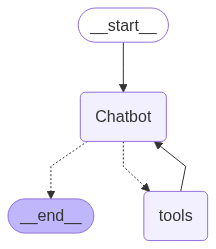

In [32]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def response_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("Chatbot", response_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "Chatbot")
builder.add_conditional_edges(
    "Chatbot", 
    tools_condition,
)
builder.add_edge("tools", "Chatbot")


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [33]:
messages=graph.invoke({"messages":HumanMessage(content="What is attention is all you need")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is attention is all you need
================================== Ai Message ==================================
Tool Calls:
  arxiv (eg2bv4qpw)
 Call ID: eg2bv4qpw
  Args:
    query: Attention is All You Need
================================= Tool Message =================================
Name: arxiv

Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time on the performance of
Llama-v2 models. We find that dropping dreeper attention layers only marginally
decreases p

In [14]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (shex0ceas)
 Call ID: shex0ceas
  Args:
    query: machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filterin

In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="Summarize Google I/O 2025")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

ສະລຸບງານ Google I/O 2025 ໃຫ້ແນ່
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (k3p7nvdjb)
 Call ID: k3p7nvdjb
  Args:
    query: Google I/O 2025 event summary
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Google I/O '25 Keynote - YouTube", "url": "https://www.youtube.com/watch?v=o8NiE3XMPrM", "content": "# Google I/O '25 Keynote\n## Google\n13300000 subscribers\n41102 likes\n\n### Description\n6926194 views\nPosted: 20 May 2025\nIt's time to I/O! Tune in to learn the latest news, announcements, and AI updates from Google. \n\n00:00:00 Opening\n00:02:17 Introduction\n00:19:29 Google DeepMind + Gemini for Developers\n00:46:04 Search\n01:11:06 Gemini \n01:24:02 Generative Media\n01:37:37 Android XR\n01:51:09 Closing\n\nTo watch this keynote interpreted i